In [ ]:
# Policy Iteration For Chain MDP

In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [15]:
class Policy_Iteration:
    def __init__(self, env, num_iteration, theta=0.01, gamma=0.95):
        self.env = env
        self.iterations = num_iteration
        self.value_function = np.zeros(env.num_states)
        self.theta = theta # precision factor
        self.discount_factor = gamma

    
    def policy_evaluation(self, policy): 
        while True:
            delta = 0
            
            for i in range(0,self.env.num_states):
                v = 0
                for action, action_probability in enumerate(policy[i]):

                    for j in range(0,self.env.num_states):
                        v+=action_probability * \
                            self.env.transition_probability[action][i][j] * \
                            (self.env.reward[j] + self.discount_factor * self.value_function[j])                    
                    #print(v, self.value_function)
                    delta = max([delta, abs(v - self.value_function[i])])
                    self.value_function[i] = v
            print(self.value_function, delta)
            if delta < self.theta:
                break
        return self.value_function
    


    def policy_improvement(self, policy):
        print("Improvement!")
        policy_stable = True

        for i in range(self.env.num_states):
            


            # one step lookahead
            state_actions = np.zeros(self.env.num_actions)
            for a in range(self.env.num_actions):
                for j in range(self.env.num_states):
                    state_actions[a] += self.env.transition_probability[a][i][j] * \
                    (self.env.reward[j] + self.discount_factor * self.value_function[j])
                
            


            if (np.argmax(state_actions) != np.argmax(policy)):
                policy_stable = False

            policy[i] = np.eye(self.env.num_actions)[np.argmax(state_actions)]
        if policy_stable:
            return policy, self.value_function
        else:
            return False, self.value_function

    def main(self):


        # initialize random policy
        policy = np.ones((self.env.num_states, self.env.num_actions)) / self.env.num_actions



        while True:
            value_function = self.policy_evaluation(policy)

            # improve function
            print("Main Function")
            policy, value_function = self.policy_improvement(policy)
            if policy:
                return policy, value_function



In [17]:
class chainMDP:
    def __init__(self):
        self.num_states = 10
        self.num_actions = 2
        self.transition_probability = np.array([[
            [0.9, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.9, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.9, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.9, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.9, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.1, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.1, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.1, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.1],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.1],
        ],
        [
            [0.1, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.1, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.1, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.1, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.1, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.9, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.9, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.9, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.9],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.9],
        ]])


        self.reward = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]

env = chainMDP()


In [18]:
policy_iteration = Policy_Iteration(env, 1000, 0.01, 1)

policy_iteration.main()

[0.5225     0.76125    0.380625   0.1903125  0.09515625 0.04757812
 0.02378906 0.01189453 0.50594727 0.87792795] 0.685125
[1.15190938 1.26626719 0.72828984 0.41172305 0.22965059 0.12671982
 0.06930718 0.28762722 1.08277759 1.34680103] 0.8594489404296877
[1.70307644 1.71568314 1.06370309 0.64667684 0.38669833 0.22800276
 0.25781499 0.67029629 1.50854866 1.67989851] 1.08957527888031
[2.1893344  2.12651875 1.38659779 0.88664806 0.55732541 0.4075702
 0.53893324 1.02374095 1.85181973 1.945196  ] 1.2571413764491541
[2.62553617 2.50606698 1.69635752 1.12684147 0.76720583 0.65306954
 0.83840524 1.34511249 2.14515424 2.17049757] 1.392593825415398
[3.0223645  2.85936101 1.99310124 1.38015354 1.01661154 0.92750839
 1.13631044 1.64073234 2.40561495 2.36980558] 1.508760522343048
[3.38739614 3.19024869 2.28520111 1.65090632 1.28920736 1.2127589
 1.42674562 1.91618029 2.64299293 2.55101344] 1.612221525022159
[3.72614464 3.50567288 2.5782896  1.93374848 1.57325369 1.49999965
 1.70808997 2.17554145 2.8

KeyboardInterrupt: 

In [19]:
def policy_evaluation(env, value_function):

  
    optimal_policy = np.zeros(env.num_states)
    new_value_function = np.zeros(env.num_states)
    for i in range(0,env.num_states):
        mat = np.zeros(env.num_actions)
        for a in range(env.num_actions):
            for j in range(0,env.num_states):
            
                p = env.transition_probability[a][i][j]

 
                mat[a] += p * (env.reward[j] + value_function[j])

        optimal_action = np.argmax(mat)
        optimal_policy[i] = optimal_action
        new_value_function[i] = mat[optimal_action]


    value_function = new_value_function

    return optimal_policy, value_function

value_function = np.zeros(env.num_states)

for i in range(10):
    optimal_policy, value_function = policy_evaluation(env, value_function)
    print(optimal_policy)
    print(value_function)



[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
[0.9 0.9 0.  0.  0.  0.  0.  0.  0.9 0.9]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
[1.8  1.71 0.81 0.   0.   0.   0.   0.81 1.71 1.8 ]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
[2.691 2.601 1.539 0.729 0.    0.    0.729 1.539 2.601 2.691]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[3.582  3.4758 2.4138 1.3851 0.6561 0.6561 1.3851 2.4138 3.4758 3.582 ]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[4.47138 4.36518 3.26673 2.23803 1.3122  1.3122  2.23803 3.26673 4.36518
 4.47138]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[5.36076  5.250915 4.152465 3.071277 2.145447 2.145447 3.071277 4.152465
 5.250915 5.36076 ]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[6.2497755 6.1399305 5.0329512 3.9517632 2.978694  2.978694  3.9517632
 5.0329512 6.1399305 6.2497755]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[7.138791   7.02809307 5.92111377 4.82752548 3.85445628 3.85445628
 4.82752548 5.92111377 7.02809307 7.138791  ]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[8.02772121 7.91702328 6.80803631 5.71444802 4.73021856 4.73021856
 5.71444802 6.80803631 7.

In [4]:
import numpy as np

# from mushroom_rl.algorithms.value import LSPI
from temp import *
from mushroom_rl.core import Core, Logger
from mushroom_rl.environments import *
from mushroom_rl.features import Features
from mushroom_rl.features.basis import PolynomialBasis, GaussianRBF
from mushroom_rl.policy import EpsGreedy
from mushroom_rl.utils.dataset import compute_episodes_length
from mushroom_rl.utils.parameters import Parameter
from mushroom_rl.utils.dataset import parse_dataset

In [156]:
h = Hello()

Initialize


In [5]:



"""
This script aims to replicate the experiments on the Inverted Pendulum MDP as
presented in:
"Least-Squares Policy Iteration". Lagoudakis M. G. and Parr R.. 2003.

"""


def experiment(g=9.8):
    np.random.seed()

    # MDP
    mdp = CartPole(g)

    # Policy
    epsilon = Parameter(value=1.)
    pi = EpsGreedy(epsilon=epsilon)

    # Agent
    r = PolynomialBasis()

    basis = [r]

    s1 = np.array([-np.pi, 0, np.pi]) * .25
    s2 = np.array([-1, 0, 1])
    for i in s1:
        for j in s2:
            basis.append(GaussianRBF(np.array([i, j]), np.array([1.])))
    features = Features(basis_list=basis)

    # print("Basis:")
    # print(basis)

    fit_params = dict()
    approximator_params = dict(input_shape=(features.size,),
                               output_shape=(mdp.info.action_space.n,),
                               n_actions=mdp.info.action_space.n)
    agent = LSPI(mdp.info, pi, approximator_params=approximator_params,
                 fit_params=fit_params, features=features)

    # Algorithm
    core = Core(agent, mdp)
    core.evaluate(n_episodes=3, render=True, quiet=True)

    # Train
    core.learn(n_episodes=500, n_episodes_per_fit=500, quiet=True)

    # Test
    test_epsilon = Parameter(0.)
    agent.policy.set_epsilon(test_epsilon)

    dataset = core.evaluate(n_episodes=1, quiet=True)
    
    core.evaluate(n_steps=100, render=True, quiet=True)
    
    return np.mean(compute_episodes_length(dataset)), dataset



# if __name__ == '__main__':
#     n_experiment = 1

    # logger = Logger(LSPI.__name__, results_dir=None)
    # logger.strong_line()
    # logger.info('Experiment Algorithm: ' + LSPI.__name__)

steps, dataset = experiment()
print(steps, len(dataset))

state, action, reward, absorbing, next_state, last = parse_dataset(dataset)

    # logger.info('Final episode length: %d' % steps)

TypeError: LSPI.__init__() got an unexpected keyword argument 'approximator_params'

In [6]:


# MDP
mdp = CartPole()
print(mdp.info)
# Policy
epsilon = Parameter(value=1.)
pi = EpsGreedy(epsilon=epsilon)

# Agent
r = PolynomialBasis()

basis = [r]

s1 = np.array([-np.pi, 0, np.pi]) * .25
s2 = np.array([-1, 0, 1])
for i in s1:
    for j in s2:
        basis.append(GaussianRBF(np.array([i, j]), np.array([1.])))
features = Features(basis_list=basis)

# print("Basis:")
# print(basis)

fit_params = dict()
approximator_params = dict(input_shape=(features.size,),
                            output_shape=(mdp.info.action_space.n,),
                            n_actions=mdp.info.action_space.n)
agent = RLSPI(mdp.info, pi, approximator_params=approximator_params,
                fit_params=fit_params, features=features)

# Algorithm
core = Core(agent, mdp)
core.evaluate(n_episodes=3, render=True, quiet=True)

# Train
core.learn(n_episodes=500, n_episodes_per_fit=500, quiet=True)

# Test
test_epsilon = Parameter(0.)
agent.policy.set_epsilon(test_epsilon)

dataset = core.evaluate(n_episodes=1, quiet=True)

v = core.evaluate(n_steps=100, render=True, quiet=True)
np.mean(compute_episodes_length(dataset))

HELLLOOO
Phi State [[1.00000000e+00 1.00819675e-01 2.74056291e-01 ... 3.04967699e-01
  8.28988154e-01 3.04967699e-01]
 [1.00000000e+00 1.01450666e-08 1.33617623e-05 ... 4.95815493e-08
  6.53023687e-05 1.16398883e-02]
 [1.00000000e+00 3.85297073e-25 3.03574881e-19 ... 8.19592876e-24
  6.45755774e-18 6.88572156e-13]
 ...
 [1.00000000e+00 2.97501547e-08 2.86700223e-05 ... 1.79569061e-07
  1.73049486e-04 2.25694072e-02]
 [1.00000000e+00 1.65092157e-17 9.22934041e-13 ... 3.38943801e-16
  1.89483727e-11 1.43359732e-07]
 [1.00000000e+00 4.48995834e-32 2.04822788e-25 ... 5.98017605e-30
  2.72803495e-23 1.68421266e-17]]
Phi State Action [[1.00000000e+00 1.00819675e-01 2.74056291e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.01450666e-08 1.33617623e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e

3000.0

In [100]:
dataset[0][0].shape

(2,)

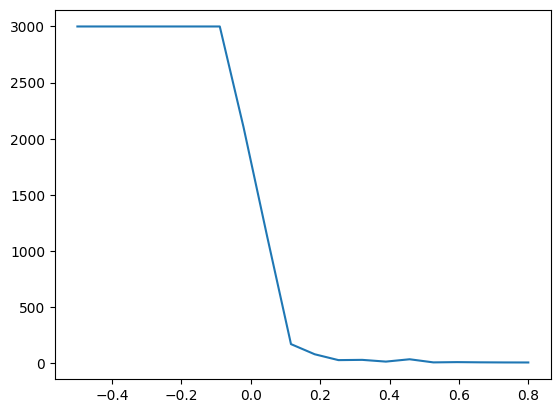

In [10]:

steps = []
l = 0.5
g = 9.8

change = np.linspace(-0.5, 0.8, 20)
parameter = g
arr = parameter + change * parameter

for i in arr:
    env = CartPole(g=i)
    core = Core(agent, env)
    total_sum = 0
    dataset = core.evaluate(n_episodes=10, render=False, quiet=True)
    # for i in range(20):
    #     dataset = core.evaluate(n_episodes=1, render=False, quiet=True)
    #     total_sum+=compute_episodes_length(dataset)
    steps.append(np.mean(compute_episodes_length(dataset)))

plt.plot(change, steps)

In [99]:
steps[35:40]

[3000.0, 2643.0, 3000.0, 3000.0, 826.0]

In [105]:
d = core.evaluate(n_episodes=1, render=True, quiet=True)

states = parse_dataset(d)[0]




KeyboardInterrupt: 

In [69]:
compute_episodes_length(d)

[468]

In [ ]:
fin_dataset = core.evaluate()

In [1]:
import numpy as np
import gym

class LSPI:
    def __init__(self, n_states, n_actions, gamma=0.99, max_iter=100, epsilon=1e-6):
        self.n_states = n_states
        self.n_actions = n_actions
        self.gamma = gamma
        self.max_iter = max_iter
        self.epsilon = epsilon

    def fit(self, transitions):
        # Initialize value function parameters
        self.weights = np.zeros((self.n_states,))
        # Collect samples
        phi_sa = np.array([np.concatenate((s, a)) for (s, a, _, _, _) in transitions])
        r = np.array([r for (_, _, r, _, _) in transitions])
        next_phi_s = np.array([np.concatenate((s, a)) for (_, _, _, s, a) in transitions])

        for _ in range(self.max_iter):
            # Update value function parameters
            A = np.dot(phi_sa.T, phi_sa) - np.dot(next_phi_s.T, phi_sa) * self.gamma
            b = np.dot(phi_sa.T, r)
            self.weights = np.linalg.solve(A, b)

            # Compute policy
            q = np.dot(phi_sa, self.weights)
            pi = np.argmax(q, axis=1)

            # Update value function parameters using LSPI update
            delta = np.max(q, axis=1)
            delta = np.array([r[i] + self.gamma * delta[i] for i in range(len(delta))]) - q[np.arange(len(q)), pi]
            while np.linalg.norm(delta) > self.epsilon:
                b = np.dot(phi_sa.T, r + self.gamma * delta)
                self.weights = np.linalg.solve(A, b)

                # Compute policy
                q = np.dot(phi_sa, self.weights)
                pi = np.argmax(q, axis=1)

                # Update value function parameters
                delta = np.max(q, axis=1)
                delta = np.array([r[i] + self.gamma * delta[i] for i in range(len(delta))]) - q[np.arange(len(q)), pi]

    def predict(self, s, actions):
        phi_s = np.tile(np.concatenate((s, actions)), (self.n_actions, 1))
        q = np.dot(phi_s, self.weights)
        return q

# Create CartPole environment
env = gym.make('CartPole-v1')
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n

# Instantiate LSPI
lspi = LSPI(n_states, n_actions)

# Collect transitions for LSPI
transitions = []
for _ in range(1000):
    s = env.reset()
    done = False
    while not done:
        a = env.action_space.sample()
        s_next, r, done, _, e = env.step(a)
        transitions.append((s, a, r, s_next, done))
        s = s_next

# Fit LSPI to the collected transitions
lspi.fit(transitions)

# Evaluate LSPI policy
n_eval_episodes = 10
eval_rewards = []
for _ in range(n_eval_episodes):
    s = env.reset()
    done = False
    total_reward = 0
    while not done:
        q = lspi.predict(s, range(n_actions))
        a = np.argmax(q)
        s_next, r, done, _ = env.step(a)
        total_reward += r
        s = s_next
    eval_rewards.append(total_reward)

# Print average evaluation reward

# Calculate average evaluation reward
avg_eval_reward = np.mean(eval_rewards)
print("Average evaluation reward: ", avg_eval_reward)

# Run the learned policy
n_test_episodes = 5
for episode in range(n_test_episodes):
    s = env.reset()
    done = False
    total_reward = 0
    while not done:
        env.render()
        q = lspi.predict(s, range(n_actions))
        a = np.argmax(q)
        s_next, r, done, _ = env.step(a)
        total_reward += r
        s = s_next
    print("Test episode: {}, Total reward: {}".format(episode + 1, total_reward))

env.close()


c:\Users\mohit\OneDrive\Desktop\Programming\Open_Source_Projects\RLSPI\venv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.